### Contents
#### Importing libraries
#### Importing data sets
#### Create a histogram of the “order_hour_of_day” column
#### Create a bar chart from the “loyalty_flag” column

### Importing libraries and data

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# defining path
path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'

In [4]:
# Importing ords_prods_customers
df_ords_prods_customers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.csv'), index_col = 0)

### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

<Axes: ylabel='Frequency'>

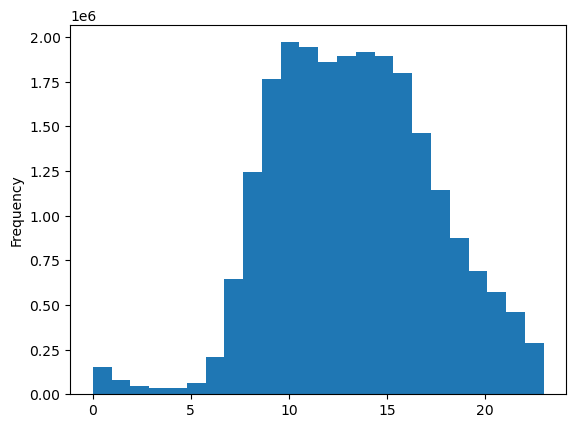

In [5]:
# Order hours of the day histogram
df_ords_prods_customers['order_hour_of_day'].plot.hist(bins = 24)

#### This chart demonstrates that the busiest time of day for orders is mid-morning through mid-afternoon, particularly 10am to 4pm. The overnight hours (after midnight to 6am) have the least order activity.

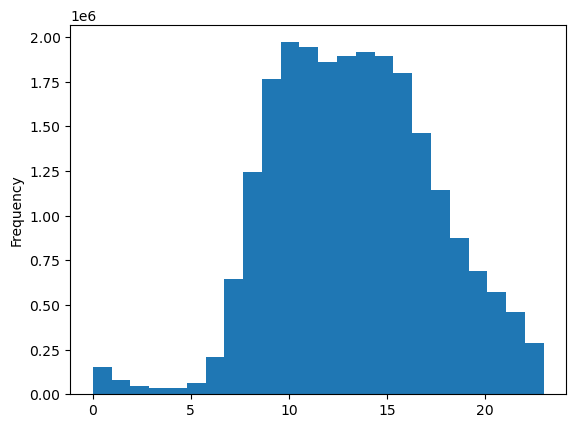

In [6]:
# Saving chart as hist
hist = df_ords_prods_customers['order_hour_of_day'].plot.hist(bins = 24)

In [7]:
# Saving histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_by_hour.png'))

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [8]:
# Recreating loyalty label that somehow didn't get saved before
df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [9]:
df_ords_prods_customers.loc[(df_ords_prods_customers['max_order'] <= 40) & (df_ords_prods_customers['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [10]:
df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [11]:
df_ords_prods_customers['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    11209209
Loyal customer       7556392
New customer         4284399
Name: count, dtype: int64

In [12]:
df_ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,1,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


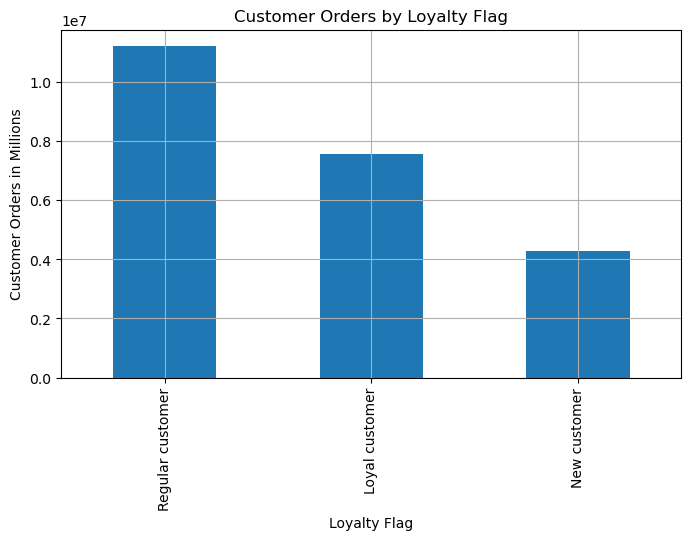

In [18]:
# Value counts for loyalty_flag
loyalty_flag_counts = df_ords_prods_customers['loyalty_flag'].value_counts()

# Create a bar chart with custom margin and y-axis title
plt.figure(figsize=(8, 6)) 
loyalty_flag_counts.plot(kind='bar')

plt.title('Customer Orders by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Customer Orders in Millions')
plt.grid(True)

# Increase the margin at the bottom
plt.subplots_adjust(bottom=0.3) 

# Define the file path to save the chart
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png')

# Save the chart to the specified path
plt.savefig(save_path)

# Display the bar chart
plt.show()


### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [19]:
# Sampling data: Create a list holding the true/false values to the test np.random.rand()<=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_customers)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
np.random.rand(10)

array([0.99593086, 0.33018511, 0.78675984, 0.2093379 , 0.90789509,
       0.63877049, 0.59226386, 0.49276085, 0.10382737, 0.0675344 ])

In [22]:
# Creating big and small dataframes
big = df_ords_prods_customers[dev]

In [23]:
small = df_ords_prods_customers[~dev]

In [24]:
# Checking df lengths
len(df_ords_prods_customers)

23050000

In [25]:
len(big)+len(small)

23050000

In [26]:
# Creating new df with only necessary columns
df_2 = small[['order_hour_of_day','prices']]

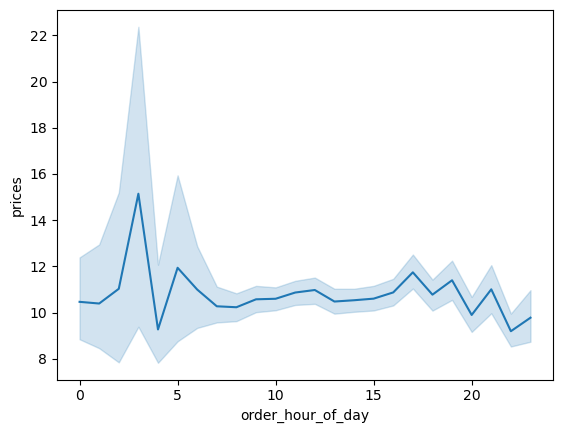

In [27]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [28]:
# Saving line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_by_hour.png'))

### 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [29]:
# Creating new df with only necessary columns
df_3 = small[['Age','Number_dependants']]

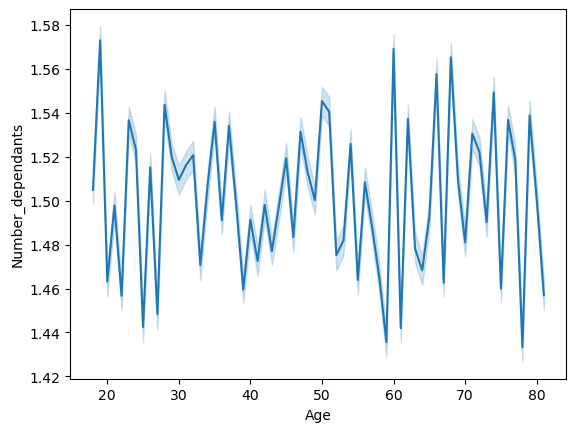

In [30]:
# Creating line chart
line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'Number_dependants')

#### The great deal of variation in the average number of dependants in adjacent age years, and the narrow range of average number of dependants (approx. 1.43 to 1.57) shows that there is little correlation between age and number of dependants. In the real world, rather than in a hypothetical dataset, I expect there would be more of a correlation between age and dependants, with the lowest and highest ages having the fewest.

In [31]:
# Saving line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_by_age.png'))

### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot.

In [32]:
# Creating new df with only necessary columns
df_4 = small[['Age','income']]

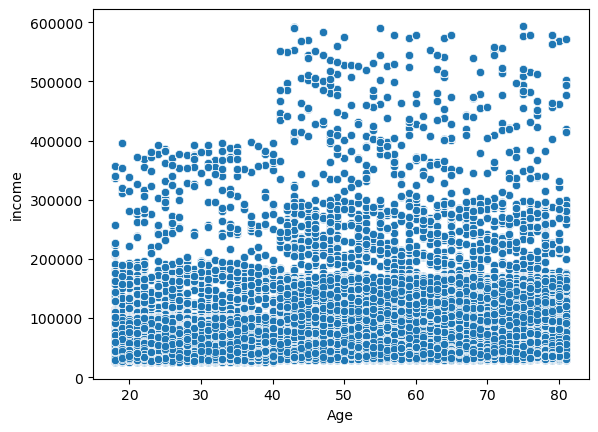

In [33]:
# Creating scatterplot
scatter = sns.scatterplot(x = 'Age', y = 'income',data = df_4)

In [34]:
# Saving scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_income_by_age.png'))

#### The scatterplot shows a distinct difference in income between those under 40 years old and those older, with the older having a much higher average income. Just to see if there's much of a trendline besides that, I'll check the data in a line chart:

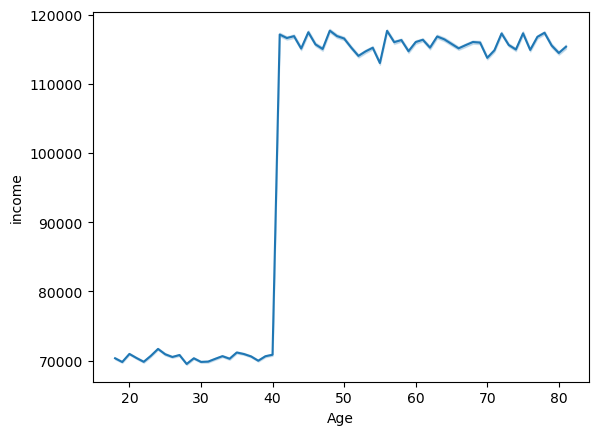

In [35]:
# Creating line chart of same data for comparison
line_3 = sns.lineplot(data = df_4, x = 'Age',y = 'income')

#### The line chart also shows the big difference between those under 40 and those older. It shows more clearly than the scatterplot that there is little other consistent correlation between age and income other than that one major difference. That is, the incomes of those under 40 do not vary significantly, and the same goes for those over 40. I expect a real world dataset would show a much more gradual increase in income, and a decline in income in the oldest age groups after working age.

In [ ]:
# Export data to csv
df_ords_prods_customers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers.csv'))

In [36]:
df_ords_prods_customers.groupby('department_id').agg({'order_number': ['sum']})

,order_number
,sum
department_id,
1,20454488
2,91967
3,12173502
4,157726550
5,901385
6,2017234
7,28705382
8,174551


In [37]:
# Calculate the total number of orders in each department
department_order_counts = df_ords_prods_customers.groupby('department_id')['order_number'].sum()

# Calculate the percentage of orders for each department
percentage_orders = (department_order_counts / department_order_counts.sum()) * 100

# Combine department numbers and percentages into a DataFrame
department_percentages_df = pd.DataFrame({
    'Department': department_order_counts.index,
    'Percentage': percentage_orders
})

# Print the DataFrame
print(department_percentages_df)

               Department  Percentage
department_id                        
1                       1    5.078008
2                       2    0.022832
3                       3    3.022180
4                       4   39.157013
5                       5    0.223777
6                       6    0.500796
7                       7    7.126365
8                       8    0.043334
9                       9    2.079567
10                     10    0.116947
11                     11    0.348277
12                     12    2.077013
13                     13    4.729012
14                     14    1.615762
15                     15    2.754869
16                     16   18.958663
17                     17    1.433467
18                     18    0.971228
19                     19    6.722941
20                     20    2.893377
21                     21    0.124573


In [39]:
department_price_sums = df_ords_prods_customers.groupby('department_id')['prices'].sum()

In [40]:
department_price_sums

department_id
1       9949742.1
2         28112.9
3       5307685.7
4      70149661.4
5        533104.5
6        942241.9
7      12561187.6
8         88650.5
9       3642516.3
10       187679.5
11       641906.0
12      8397960.3
13      9092540.3
14      3104173.2
15      4809671.2
16    101935352.2
17      2487843.4
18      1455811.4
19      6718905.6
20      5334888.5
21       212268.1
Name: prices, dtype: float64

In [41]:
# Calculate the sum of prices for each department
department_price_sums = df_ords_prods_customers.groupby('department_id')['prices'].sum()

# Calculate the total sum of prices for the entire dataset
total_revenue = department_price_sums.sum()

# Calculate the percentage of total revenue for each department
department_percent_of_total = (department_price_sums / total_revenue)

# Print the results as percentages with a decimal point
print(department_percent_of_total)

department_id
1     0.040188
2     0.000114
3     0.021438
4     0.283339
5     0.002153
6     0.003806
7     0.050735
8     0.000358
9     0.014712
10    0.000758
11    0.002593
12    0.033920
13    0.036725
14    0.012538
15    0.019427
16    0.411724
17    0.010049
18    0.005880
19    0.027138
20    0.021548
21    0.000857
Name: prices, dtype: float64
